In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D://project laptop price predictor//laptop_data.csv")
df.head()

,Unnamed: 0,Unnamed: 1,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,NaN,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,NaN,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,NaN,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,NaN,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,NaN,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
df.drop(columns=["Unnamed: 0","Unnamed: 1"],inplace=True)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.shape

(1303, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [6]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [7]:
df.duplicated().sum()

29

In [8]:
df=df.drop_duplicates()
df.shape

(1274, 11)

In [9]:
df['Ram']=df['Ram'].str.replace('GB','')
df['Weight']=df['Weight'].str.replace('kg','')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [10]:
df['Ram']=df['Ram'].astype('int32')
df['Weight']=df['Weight'].astype('float32')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1274 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int32  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float32
 10  Price             1274 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 109.5+ KB


In [12]:
import seaborn as sns

C:\Users\AMAN SRIVASTAVA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

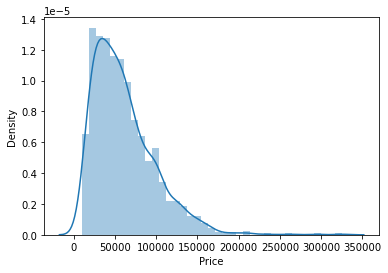

In [13]:
sns.distplot(df['Price'])

<AxesSubplot:>

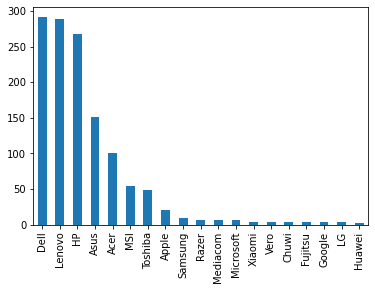

In [14]:
df['Company'].value_counts().plot(kind='bar')

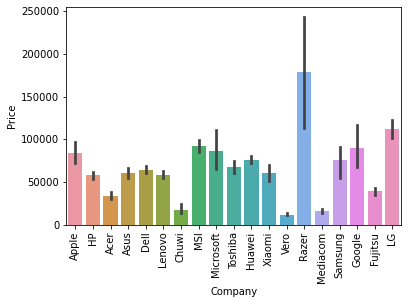

In [15]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:>

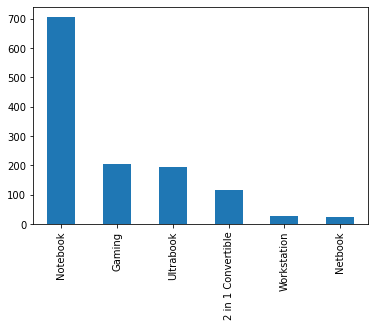

In [16]:
df['TypeName'].value_counts().plot(kind='bar')

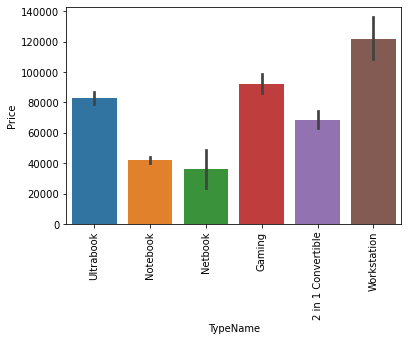

In [17]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\AMAN SRIVASTAVA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Inches', ylabel='Density'>

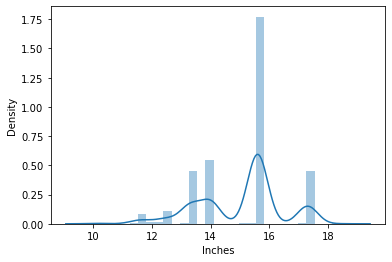

In [18]:
sns.distplot(df['Inches'])

<AxesSubplot:xlabel='Inches', ylabel='Price'>

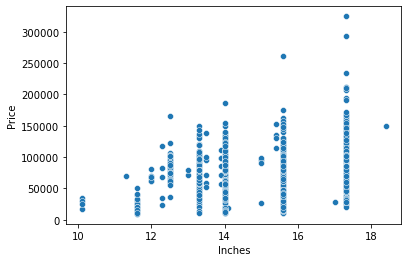

In [19]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

In [20]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                505
1366x768                                         262
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
1440x900                                      

In [21]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [24]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
484,Lenovo,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,2.30,30103.2000,0
1058,Dell,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12,256GB SSD,Intel HD Graphics 620,Windows 10,1.60,69210.7200,1
1116,Lenovo,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,16,256GB SSD + 1.0TB Hybrid,Nvidia GeForce GTX 980M,Windows 10,4.60,146519.4672,0
161,Acer,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,4,256GB SSD,Nvidia GeForce MX150,Windows 10,3.00,42890.4000,0
387,Dell,Workstation,15.6,Full HD 1920x1080,Intel Core i5 6440HQ 2.6GHz,8,500GB HDD,AMD FirePro W5130M,Windows 10,2.23,72940.3200,0


<AxesSubplot:>

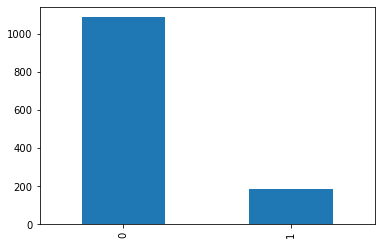

In [25]:
df['Touchscreen'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Touchscreen', ylabel='Price'>

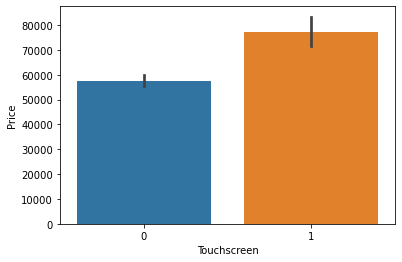

In [26]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

In [27]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [28]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
568,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Pentium Quad Core N4200 1.1GHz,4,500GB HDD,Intel HD Graphics 505,Windows 10,2.20,18328.32,0,0
450,HP,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8,128GB SSD,Intel HD Graphics 620,Windows 10,1.91,31381.92,0,0
1174,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Nvidia GeForce 940MX,No OS,2.20,37775.52,0,0
699,HP,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,4,500GB HDD,AMD Radeon 530,Windows 10,2.10,36709.92,0,1
366,Dell,Notebook,17.3,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,128GB SSD + 1TB HDD,AMD Radeon 530,Windows 10,2.80,57808.80,0,0


<AxesSubplot:>

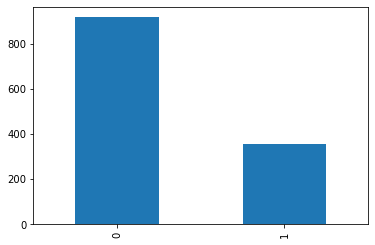

In [29]:
df['Ips'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Ips', ylabel='Price'>

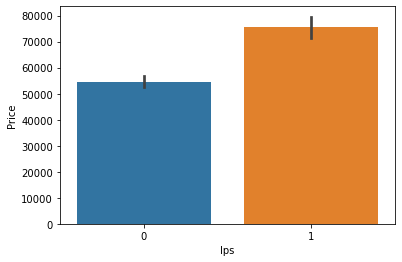

In [30]:
sns.barplot(x=df['Ips'],y=df['Price'])

In [32]:
new =df['ScreenResolution'].str.split('x',n=1,expand=True)

In [33]:
df['X_res']=new[0]
df['Y_res']=new[1]

In [34]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [37]:
df['X_res']=df['X_res'].str.replace(',','').str.findall('\d+\.?\d+').apply(lambda x:x[0])

In [38]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [40]:
df['X_res']=df['X_res'].astype('int32')
df['Y_res']=df['Y_res'].astype('int32')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1274 entries, 0 to 1273
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int32  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float32
 10  Price             1274 non-null   float64
 11  Touchscreen       1274 non-null   int64  
 12  Ips               1274 non-null   int64  
 13  X_res             1274 non-null   int32  
 14  Y_res             1274 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 179.3+ KB


In [42]:
df['ppi']=(((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [43]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [45]:
df.corr()['Price']

Inches         0.066990
Ram            0.740106
Weight         0.212192
Price          1.000000
Touchscreen    0.188631
Ips            0.250358
X_res          0.552074
Y_res          0.548111
ppi            0.469539
Name: Price, dtype: float64

In [46]:
df.drop(columns=['ScreenResolution','X_res','Y_res'],inplace=True)

In [47]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [48]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz              190
Intel Core i7 7700HQ 2.8GHz             146
Intel Core i7 7500U 2.7GHz              132
Intel Core i7 8550U 1.8GHz               73
Intel Core i5 8250U 1.6GHz               72
                                       ... 
Intel Core i7 2.7GHz                      1
Intel Core i5 1.3GHz                      1
Intel Pentium Dual Core 4405U 2.1GHz      1
Intel Core i5 7200U 2.70GHz               1
AMD Ryzen 1600 3.2GHz                     1
Name: Cpu, Length: 118, dtype: int64

In [52]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [53]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [71]:
def fetch_processor(text):
    if text == 'Intel Core i3' or text == 'Intel Core i5' or text == 'Intel Core i7':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processors'
        else:
            return 'AMD Processors'

In [72]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [73]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


<AxesSubplot:>

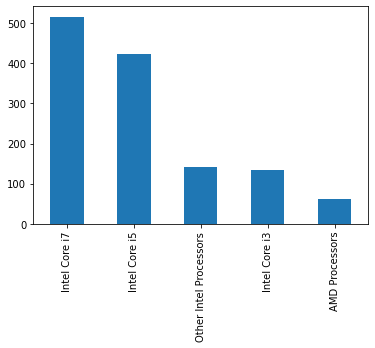

In [75]:
df['Cpu brand'].value_counts().plot(kind='bar')

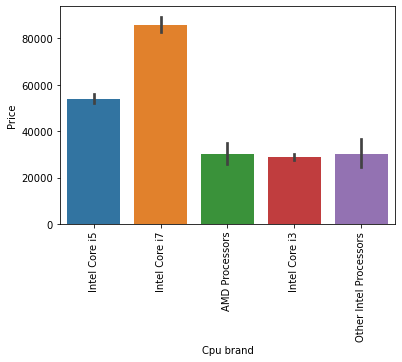

In [76]:
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [77]:
df.drop(columns=['Cpu','Cpu Name'])

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.20,38378.6496,0,0,100.454670,Intel Core i7
1270,Lenovo,2 in 1 Convertible,14.0,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7
1271,Lenovo,2 in 1 Convertible,13.3,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7
1272,Lenovo,Notebook,14.0,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Other Intel Processors


<AxesSubplot:>

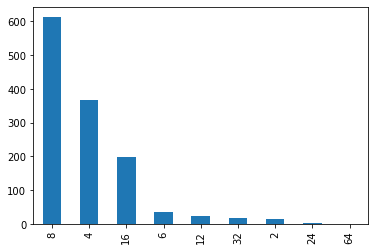

In [78]:
df['Ram'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Ram', ylabel='Price'>

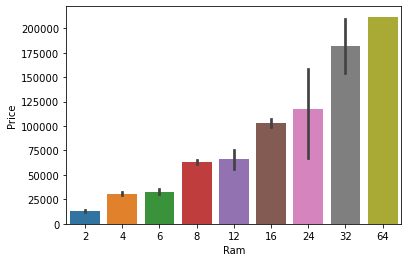

In [80]:
sns.barplot(x=df['Ram'],y=df['Price'])

In [81]:
df['Memory'].value_counts()

256GB SSD                       412
1TB HDD                         215
500GB HDD                       123
512GB SSD                       114
128GB SSD + 1TB HDD              94
128GB SSD                        74
256GB SSD + 1TB HDD              73
32GB Flash Storage               36
2TB HDD                          16
1TB SSD                          14
512GB SSD + 1TB HDD              14
64GB Flash Storage               13
256GB SSD + 2TB HDD              10
256GB Flash Storage               8
16GB Flash Storage                7
1.0TB Hybrid                      7
32GB SSD                          6
180GB SSD                         5
128GB Flash Storage               4
512GB SSD + 2TB HDD               3
16GB SSD                          3
256GB SSD + 500GB HDD             2
512GB Flash Storage               2
256GB SSD + 256GB SSD             2
1TB SSD + 1TB HDD                 2
128GB SSD + 2TB HDD               2
8GB SSD                           1
32GB HDD                    

In [185]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flashstorage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flashstorage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flashstorage"]=(df["first"]*df["Layer1Flashstorage"]+df["second"]*df["Layer2Flashstorage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flashstorage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flashstorage'],inplace=True)


In [191]:
df.sample(5)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu brand,HDD,SSD,Hybrid,Flashstorage
944,Lenovo,2 in 1 Convertible,11.3,Intel Core M m7-6Y75 1.2GHz,8,256 SSD,Intel HD Graphics 515,Windows 10,1.10,69210.72,1,1,194.947537,Intel Core M,Other Intel Processors,0,256,0,0
19,Dell,Ultrabook,13.3,Intel Core i5 8250U 1.6GHz,8,128 SSD,Intel UHD Graphics 620,Windows 10,1.22,52161.12,1,1,165.632118,Intel Core i5,Intel Core i5,0,128,0,0
72,Dell,Notebook,15.6,Intel Core i7 8550U 1.8GHz,8,256 SSD,AMD Radeon 530,Windows 10,2.20,46353.60,0,0,141.211998,Intel Core i7,Intel Core i7,0,256,0,0
455,Dell,2 in 1 Convertible,11.6,Intel Pentium Quad Core N3710 1.6GHz,4,500 HDD,Intel HD Graphics 405,Windows 10,1.47,25521.12,1,0,135.094211,Intel Pentium Quad,Other Intel Processors,500,0,0,0
416,Dell,Notebook,13.3,Intel Core i3 6006U 2GHz,4,128 SSD,Intel HD Graphics 520,Windows 10,1.65,36709.92,0,0,117.826530,Intel Core i3,Intel Core i3,0,128,0,0


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1274 entries, 0 to 1273
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       1274 non-null   object 
 1   TypeName      1274 non-null   object 
 2   Inches        1274 non-null   float64
 3   Cpu           1274 non-null   object 
 4   Ram           1274 non-null   int32  
 5   Memory        1274 non-null   object 
 6   Gpu           1274 non-null   object 
 7   OpSys         1274 non-null   object 
 8   Weight        1274 non-null   float32
 9   Price         1274 non-null   float64
 10  Touchscreen   1274 non-null   int64  
 11  Ips           1274 non-null   int64  
 12  ppi           1274 non-null   float64
 13  Cpu Name      1274 non-null   object 
 14  Cpu brand     1274 non-null   object 
 15  HDD           1274 non-null   int64  
 16  SSD           1274 non-null   int64  
 17  Hybrid        1274 non-null   int64  
 18  Flashstorage  1274 non-null 

In [195]:
df=df.drop(columns=['Memory','Cpu Name'])

In [197]:
 df.head()

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flashstorage
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [199]:
df.drop(columns=['Hybrid','Flashstorage'],inplace=True)

In [198]:
df['Gpu'].value_counts()

Intel HD Graphics 620      280
Intel HD Graphics 520      181
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Nvidia GeForce GTX1080       1
AMD Radeon R7 M465           1
Nvidia Quadro 3000M          1
Intel Iris Pro Graphics      1
AMD R4 Graphics              1
Name: Gpu, Length: 106, dtype: int64

In [200]:
df['Gpu Brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [201]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [202]:
df['Gpu Brand'].value_counts()

Intel     703
Nvidia    396
AMD       174
ARM         1
Name: Gpu Brand, dtype: int64

In [203]:
df = df[df['Gpu Brand']!= 'ARM']

In [204]:
df['Gpu Brand'].value_counts()

Intel     703
Nvidia    396
AMD       174
Name: Gpu Brand, dtype: int64

<AxesSubplot:xlabel='Gpu Brand', ylabel='Price'>

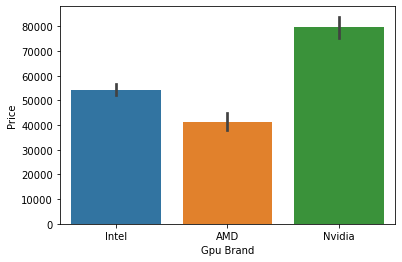

In [205]:
sns.barplot(x=df['Gpu Brand'],y=df['Price'])

In [208]:
df=df.drop(columns=['Gpu','Inches','Cpu'])

In [209]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [188]:
df['OpSys'].value_counts()

Windows 10      1047
No OS             66
Linux             58
Windows 7         45
Chrome OS         27
macOS             13
Windows 10 S       8
Mac OS X           8
Android            2
Name: OpSys, dtype: int64

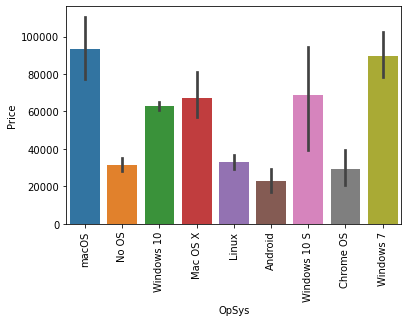

In [211]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [221]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [222]:
df['os'] = df['OpSys'].apply(cat_os)

In [223]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu Brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [224]:
df.drop(columns=['OpSys'],inplace=True)

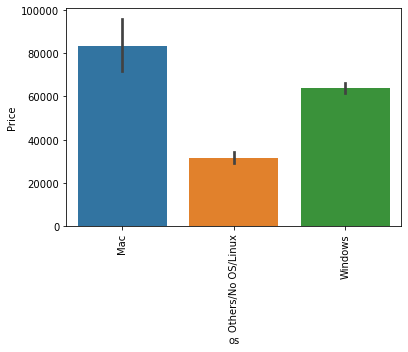

In [225]:
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='Weight', ylabel='Density'>

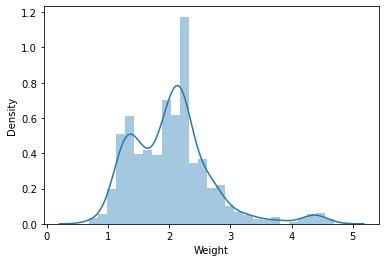

In [228]:
sns.distplot(df['Weight'])

<AxesSubplot:xlabel='Weight', ylabel='Price'>

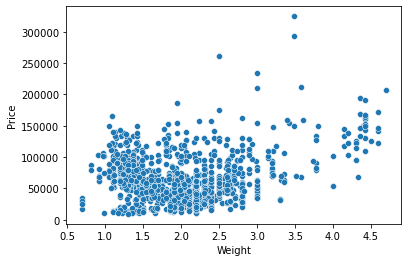

In [229]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [230]:
df.corr()['Price']

Ram            0.739996
Weight         0.211667
Price          1.000000
Touchscreen    0.190382
Ips            0.251514
ppi            0.471481
HDD           -0.098481
SSD            0.669808
Name: Price, dtype: float64

<AxesSubplot:>

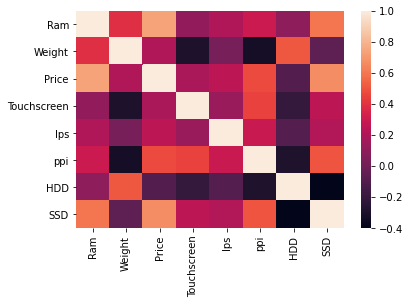

In [231]:
sns.heatmap(df.corr())

C:\Users\AMAN SRIVASTAVA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

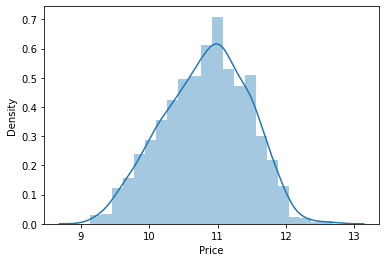

In [232]:
sns.distplot(np.log(df['Price']))

In [234]:
X=df.drop(columns=['Price'])
y=np.log(df['Price'])

In [235]:
X

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu Brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,4,2.20,0,0,100.454670,Intel Core i7,500,0,Nvidia,Windows
1270,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1271,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1272,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processors,0,0,Intel,Windows


In [236]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1269    10.555257
1270    10.433899
1271    11.288115
1272     9.409283
1273    10.614129
Name: Price, Length: 1273, dtype: float64

In [237]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=2)

In [238]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu Brand,os
1206,HP,Notebook,8,1.91,0,0,100.454670,Intel Core i5,0,256,Intel,Windows
279,Lenovo,Notebook,8,2.80,0,0,127.335675,Intel Core i7,2000,0,Nvidia,Others/No OS/Linux
1205,Dell,Notebook,8,2.36,0,0,141.211998,Intel Core i5,0,256,AMD,Windows
1123,Dell,Notebook,4,2.09,0,0,100.454670,Intel Core i5,500,0,Intel,Others/No OS/Linux
391,Asus,Gaming,16,3.00,0,0,127.335675,Intel Core i7,1000,256,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processors,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux


In [239]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [240]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [326]:
R2_score = []
MAE = []

# Linear Regression

In [422]:
S1= ColumnTransformer(transformers = [
    ('tnf_col',OneHotEncoder (sparse = False,drop='first'),[0,1,7,10,11])
],remainder = 'passthrough')

S2=LinearRegression()

pipe=Pipeline([
    ('S1',S1),
    ('S2',S2)
])

pipe.fit(X_train,y_train)

y_pred= pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
R2_score.append(r2_score(y_test,y_pred))
MAE.append(mean_absolute_error(y_test,y_pred))

R2 score 0.795467757872002
MAE 0.20907244499180186


# Ridge Regression

In [423]:
S1= ColumnTransformer(transformers = [
    ('tnf_col',OneHotEncoder (sparse = False,drop='first'),[0,1,7,10,11])
],remainder = 'passthrough')

S2=Ridge(alpha=1)

pipe=Pipeline([
    ('S1',S1),
    ('S2',S2)
])

pipe.fit(X_train,y_train)

y_pred= pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
R2_score.append(r2_score(y_test,y_pred))
MAE.append(mean_absolute_error(y_test,y_pred))

R2 score 0.8026531642593361
MAE 0.20514064735415916


# Lasso Regression

In [424]:
S1= ColumnTransformer(transformers = [
    ('tnf_col',OneHotEncoder (sparse = False,drop='first'),[0,1,7,10,11])
],remainder = 'passthrough')

S2=Lasso(alpha=0.001)

pipe=Pipeline([
    ('S1',S1),
    ('S2',S2)
])

pipe.fit(X_train,y_train)

y_pred= pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
R2_score.append(r2_score(y_test,y_pred))
MAE.append(mean_absolute_error(y_test,y_pred))

R2 score 0.8030174077863057
MAE 0.20705937601902544


# KNN

In [425]:
S1= ColumnTransformer(transformers = [
    ('tnf_col',OneHotEncoder (sparse = False,drop='first'),[0,1,7,10,11])
],remainder = 'passthrough')

S2=KNeighborsRegressor(n_neighbors=6)

pipe=Pipeline([
    ('S1',S1),
    ('S2',S2)
])

pipe.fit(X_train,y_train)

y_pred= pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
R2_score.append(r2_score(y_test,y_pred))
MAE.append(mean_absolute_error(y_test,y_pred))

R2 score 0.7499567106456935
MAE 0.2125979780711184


# Decision Tree

In [426]:
S1= ColumnTransformer(transformers = [
    ('tnf_col',OneHotEncoder (sparse = False,drop='first'),[0,1,7,10,11])
],remainder = 'passthrough')

S2=DecisionTreeRegressor(max_depth=8)

pipe=Pipeline([
    ('S1',S1),
    ('S2',S2)
])

pipe.fit(X_train,y_train)

y_pred= pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
R2_score.append(r2_score(y_test,y_pred))
MAE.append(mean_absolute_error(y_test,y_pred))

R2 score 0.7788173501259212
MAE 0.21544836019588406


# SVM

In [427]:
S1= ColumnTransformer(transformers = [
    ('tnf_col',OneHotEncoder (sparse = False,drop='first'),[0,1,7,10,11])
],remainder = 'passthrough')

S2=SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe=Pipeline([
    ('S1',S1),
    ('S2',S2)
])

pipe.fit(X_train,y_train)

y_pred= pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
R2_score.append(r2_score(y_test,y_pred))
MAE.append(mean_absolute_error(y_test,y_pred))

R2 score 0.8353491547717198
MAE 0.18951004245406802


# Random forest

In [428]:
S1= ColumnTransformer(transformers = [
    ('tnf_col',OneHotEncoder (sparse = False,drop='first'),[0,1,7,10,11])
],remainder = 'passthrough')

S2=RandomForestRegressor(n_estimators=100, max_features=3,random_state=3,max_depth=15)

pipe=Pipeline([
    ('S1',S1),
    ('S2',S2)
])

pipe.fit(X_train,y_train)

y_pred= pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
R2_score.append(r2_score(y_test,y_pred))
MAE.append(mean_absolute_error(y_test,y_pred))

R2 score 0.8801350243635806
MAE 0.16085429998304424


# Adaboost

In [429]:
S1= ColumnTransformer(transformers = [
    ('tnf_col',OneHotEncoder (sparse = False,drop='first'),[0,1,7,10,11])
],remainder = 'passthrough')

S2=AdaBoostRegressor(n_estimators=72,learning_rate=1.0)

pipe=Pipeline([
    ('S1',S1),
    ('S2',S2)
])

pipe.fit(X_train,y_train)

y_pred= pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
R2_score.append(r2_score(y_test,y_pred))
MAE.append(mean_absolute_error(y_test,y_pred))

R2 score 0.8087098921391709
MAE 0.20904760472557932


# Gradient Boost

In [430]:
S1= ColumnTransformer(transformers = [
    ('tnf_col',OneHotEncoder (sparse = False,drop='first'),[0,1,7,10,11])
],remainder = 'passthrough')

S2=GradientBoostingRegressor(n_estimators= 500,
          max_depth= 8,
          min_samples_split= 5,
          learning_rate= 0.01,
          )

pipe=Pipeline([
    ('S1',S1),
    ('S2',S2)
])

pipe.fit(X_train,y_train)

y_pred= pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
R2_score.append(r2_score(y_test,y_pred))
MAE.append(mean_absolute_error(y_test,y_pred))

R2 score 0.8513349448947147
MAE 0.16935354855390225


In [431]:
algorithms = ['Linear Regression','Ridge Regression','Lasso Regression','KNN','Decision Tree','SVM','Random forest','Adaboost','Gradient Boost']
#creating a dataframe to showcase all the model's performance metrices
performance_tab = pd.DataFrame({'Algorithm':algorithms,'R-Square':R2_score,'Mean Absolute Error':MAE,}).sort_values('R-Square',ascending=False)
performance_tab

,Algorithm,R-Square,Mean Absolute Error
6,Random forest,0.880135,0.160854
8,Gradient Boost,0.851335,0.169354
5,SVM,0.835349,0.189510
7,Adaboost,0.808710,0.209048
2,Lasso Regression,0.803017,0.207059
1,Ridge Regression,0.802653,0.205141
0,Linear Regression,0.795468,0.209072
4,Decision Tree,0.778817,0.215448
3,KNN,0.749957,0.212598


In [432]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [421]:
R2_score.clear()